# Predicción de Obesidad

In [1]:
# Cargamos el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Obtencion de los datos

Los datos están contenidos en el fichero `bmi.csv`.

Importamos Numpy, Panda, Matplotlib y Seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = '/content/drive/MyDrive/Dataset/bmi.csv'
bmidata = pd.read_csv(file_path)

In [6]:
bmidata.describe()

,Age,Height,Weight,Bmi
count,741.000000,741.000000,741.000000,741.000000
mean,31.618084,1.709427,78.412497,26.365427
std,11.655466,0.085974,32.254547,9.223191
min,15.000000,1.460000,25.900000,12.150497
25%,22.000000,1.670000,63.000000,22.129740
50%,29.000000,1.721000,72.900000,24.132412
75%,40.000000,1.751000,83.300000,27.249306
max,61.000000,2.070000,270.000000,66.301350


## Muestras generales del dataset.

In [7]:
bmidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB


In [8]:
bmidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB


In [35]:
bmidata["BmiClass"].unique()

array(['Normal Weight', 'Obese Class 2', 'Underweight', 'Obese Class 3',
       'Overweight', 'Obese Class 1'], dtype=object)

In [36]:
bmidata["BmiClass"].replace(['Normal Weight', 'Obese Class 2', 'Underweight', 'Obese Class 3',
       'Overweight', 'Obese Class 1'], [1., 4., 0., 5., 2., 3.],inplace=True)
bmidata

,Age,Height,Weight,Bmi,BmiClass
639,36,1.740,70.80,23.384859,1.0
310,28,1.820,126.80,38.280401,4.0
299,28,1.820,66.00,19.925130,1.0
58,50,1.620,46.00,17.527816,0.0
314,27,1.759,71.90,23.237918,1.0
...,...,...,...,...,...
577,15,1.550,85.00,35.379813,4.0
417,22,1.690,135.00,47.267253,5.0
528,18,1.690,63.80,22.338153,1.0
236,31,1.740,76.19,25.165147,2.0


### Un gráfico de cada uno de los atributos.

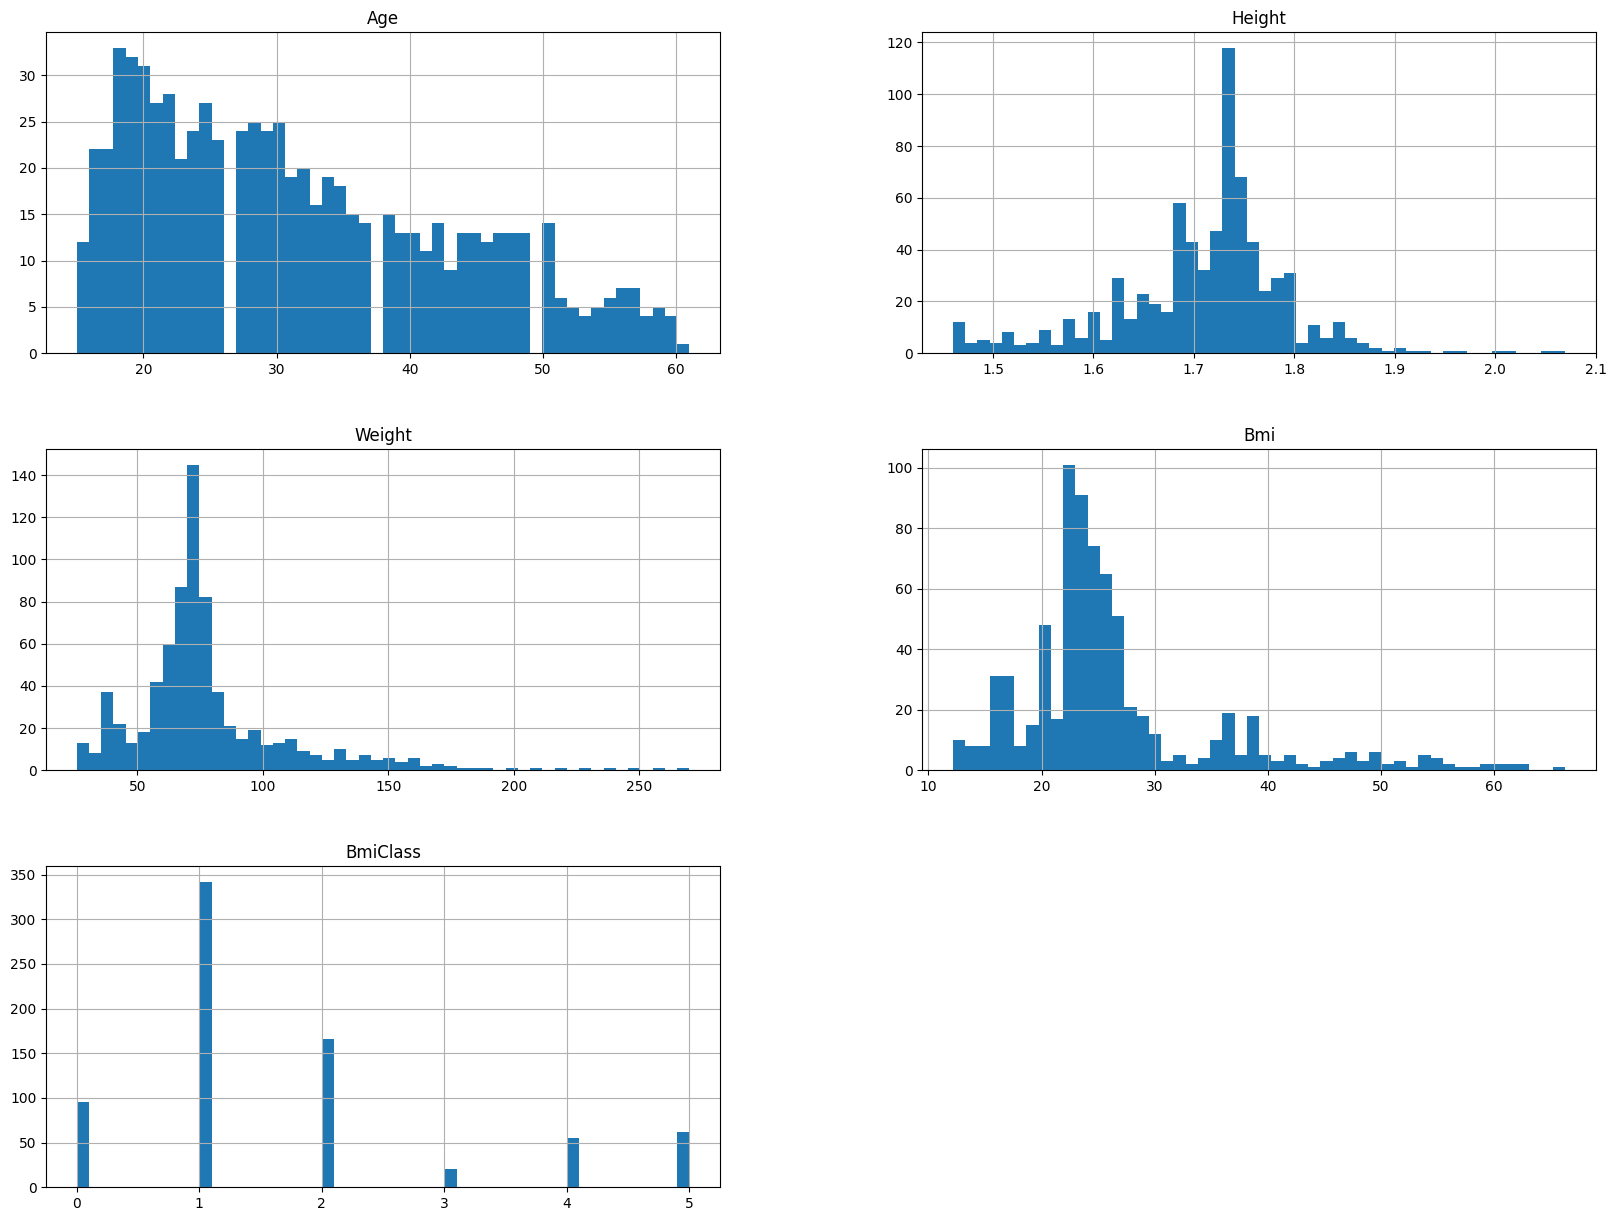

In [37]:
#Un gráfico de cada uno de los atributos.
bmidata.hist(bins=50 ,figsize=(20, 15))
plt.show()

In [38]:
# Matriz de correlaciones(vemos las correlaciones entre todos los atributos)

corr_matrix = bmidata.corr()
corr_matrix

,Age,Height,Weight,Bmi,BmiClass
Age,1.000000,0.023128,0.109610,0.139157,0.159871
Height,0.023128,1.000000,0.607672,0.433309,0.399488
Weight,0.109610,0.607672,1.000000,0.966921,0.903499
Bmi,0.139157,0.433309,0.966921,1.000000,0.950616
BmiClass,0.159871,0.399488,0.903499,0.950616,1.000000


In [39]:
# Relación de cada uno de los atributos con la edad de los empleados(Un ejemplo)

corr_matrix["Age"].sort_values(ascending=False)

Age         1.000000
BmiClass    0.159871
Bmi         0.139157
Weight      0.109610
Height      0.023128
Name: Age, dtype: float64

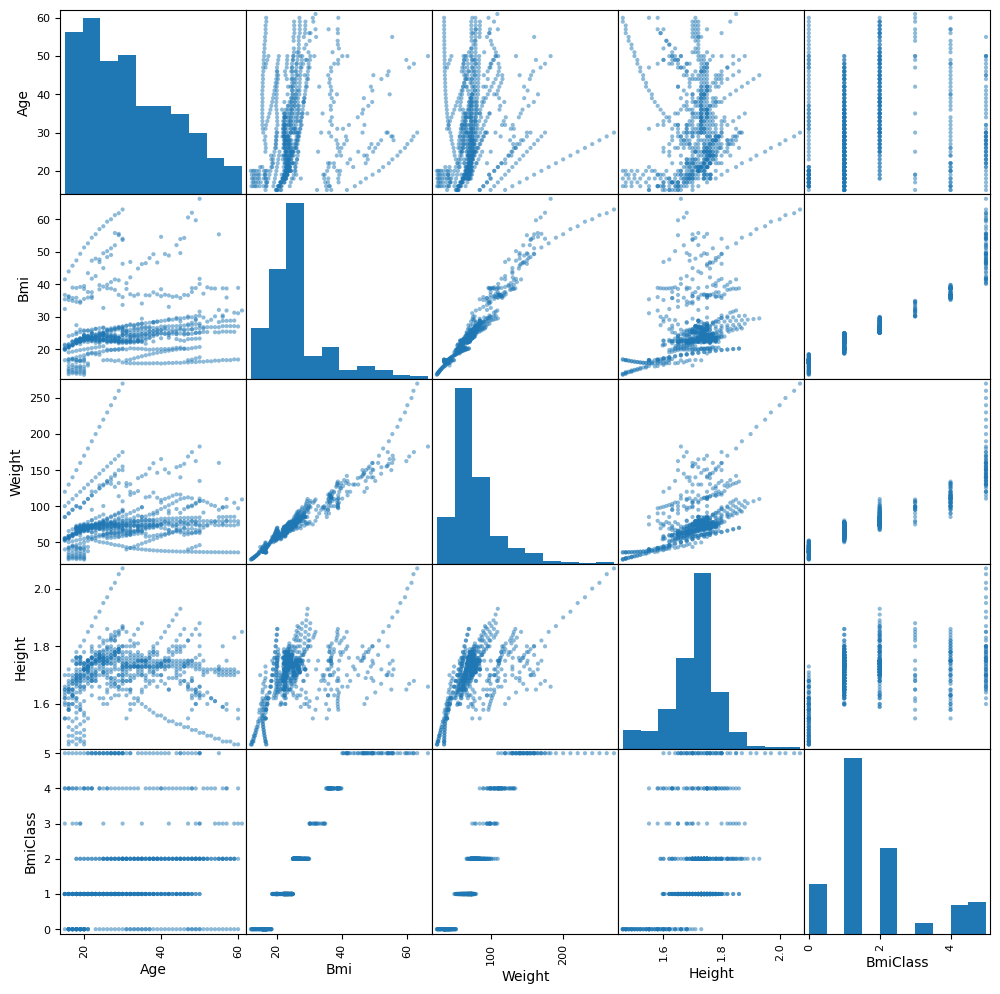

In [42]:
# Gráfico de correlaciones de 5 atributos importantes

from pandas.plotting import scatter_matrix

attributes = ["Age","Bmi","Weight","Height","BmiClass"]
pd.plotting.scatter_matrix(bmidata[attributes], figsize=(12,12))
plt.show()

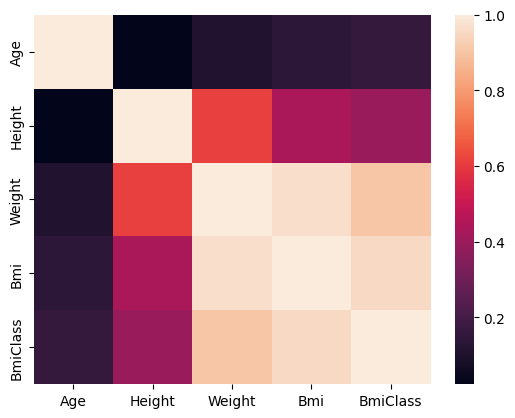

In [43]:
sns.heatmap(corr_matrix)
plt.show()

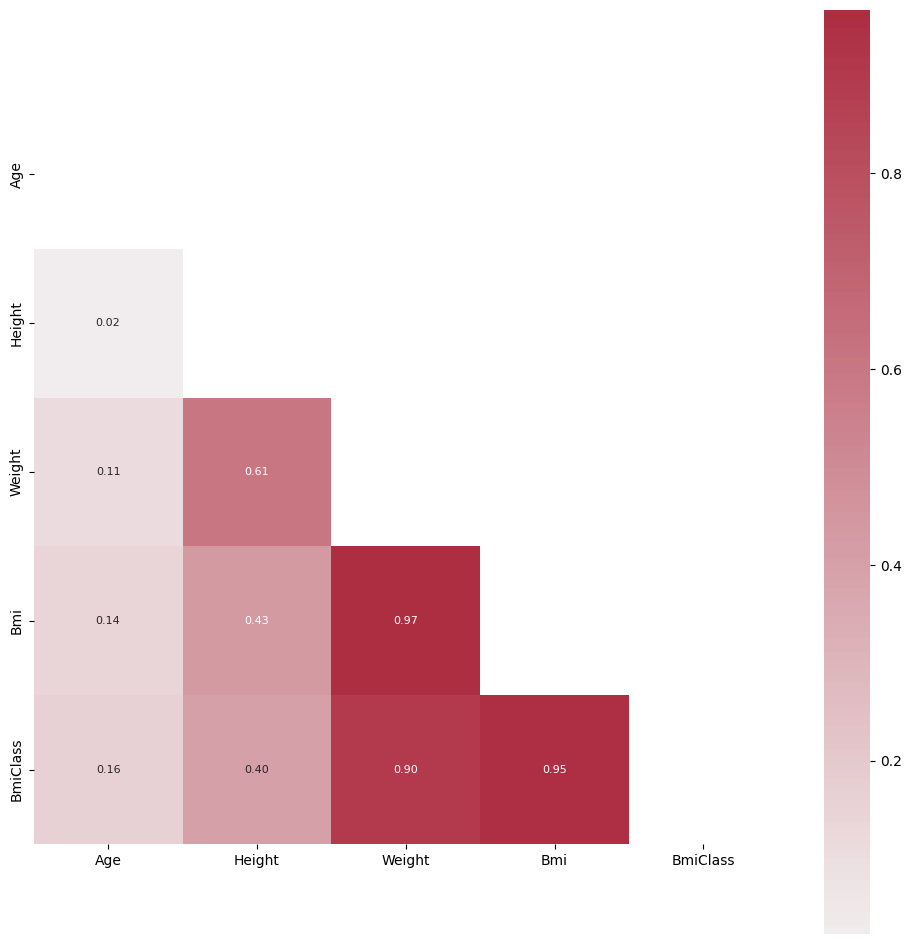

In [44]:
# Igual pero más intuitivo

# Crea una máscara
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Crea una paleta personalizada
cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap, annot_kws={"size": 8})
plt.show()

## Combinaciones de atributos (featuring engineering)

In [45]:
bmidata

,Age,Height,Weight,Bmi,BmiClass
639,36,1.740,70.80,23.384859,1.0
310,28,1.820,126.80,38.280401,4.0
299,28,1.820,66.00,19.925130,1.0
58,50,1.620,46.00,17.527816,0.0
314,27,1.759,71.90,23.237918,1.0
...,...,...,...,...,...
577,15,1.550,85.00,35.379813,4.0
417,22,1.690,135.00,47.267253,5.0
528,18,1.690,63.80,22.338153,1.0
236,31,1.740,76.19,25.165147,2.0


### Mezcla de datos

Antes de trocear el dataset, vamos a "barajarlo" para asegurarnos que no tenemos los datos agrupados por algún criterio

El método `sample()`extrae una muestra aleatoria del dataframe.

In [46]:
# extrae la mitad del dataframe de forma aleatoria

bmidata.sample(frac=0.5)

,Age,Height,Weight,Bmi,BmiClass
275,29,1.7798,74.60,23.550299,1.0
211,33,1.7290,72.81,24.355724,1.0
166,37,1.7298,80.40,26.869789,2.0
563,16,1.6700,58.00,20.796730,1.0
508,19,1.4700,26.90,12.448517,0.0
...,...,...,...,...,...
400,23,1.7500,74.00,24.163265,1.0
349,25,1.7500,74.68,24.385306,1.0
292,28,1.7900,77.61,24.222090,1.0
69,49,1.5100,36.60,16.051928,0.0


In [47]:
# extrae todo el dataframe de forma aleatoria

bmidata.sample(frac=1)

,Age,Height,Weight,Bmi,BmiClass
503,19,1.59,41.20,16.296824,0.0
43,52,1.72,79.30,26.805030,2.0
660,22,1.69,64.30,22.513217,1.0
717,48,1.84,101.00,29.832231,2.0
574,16,1.49,29.90,13.467862,0.0
...,...,...,...,...,...
297,28,1.72,165.00,55.773391,5.0
72,48,1.73,74.11,24.761937,1.0
701,34,1.75,61.80,20.179592,1.0
616,25,1.75,70.20,22.922449,1.0


In [51]:
bmidata.head()

,Age,Height,Weight,Bmi,BmiClass
290,28,1.78,74.71,23.579725,1.0
104,44,1.73,74.12,24.765278,1.0
595,28,1.85,142.00,41.490139,5.0
493,19,1.64,48.00,17.846520,0.0
476,20,1.54,34.90,14.715804,0.0


In [52]:
bmidata = bmidata.sample(frac=1)
bmidata.head()

,Age,Height,Weight,Bmi,BmiClass
600,50,1.66,182.7,66.301350,5.0
26,56,1.80,98.5,30.401235,3.0
563,16,1.67,58.0,20.796730,1.0
221,32,1.74,76.2,25.168450,2.0
622,28,1.78,74.6,23.545007,1.0


In [53]:
bmidata.head()

,Age,Height,Weight,Bmi,BmiClass
600,50,1.66,182.7,66.301350,5.0
26,56,1.80,98.5,30.401235,3.0
563,16,1.67,58.0,20.796730,1.0
221,32,1.74,76.2,25.168450,2.0
622,28,1.78,74.6,23.545007,1.0


In [54]:
bmidata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 600 to 38
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 34.7 KB


### Separación de la matriz de características $X$ de los datos de salida $y$ (el target).

Aquí ya buscamos de objetivo el valor de obesidad.

In [55]:
y = bmidata["BmiClass"]
y

600    5.0
26     3.0
563    1.0
221    2.0
622    1.0
      ... 
369    2.0
81     2.0
705    1.0
120    2.0
38     4.0
Name: BmiClass, Length: 741, dtype: float64

In [56]:
X = bmidata.drop("BmiClass", axis=1)
X

,Age,Height,Weight,Bmi
600,50,1.66,182.7,66.301350
26,56,1.80,98.5,30.401235
563,16,1.67,58.0,20.796730
221,32,1.74,76.2,25.168450
622,28,1.78,74.6,23.545007
...,...,...,...,...
369,25,1.71,77.7,26.572279
81,47,1.75,83.8,27.363265
705,45,1.79,65.7,20.504978
120,42,1.75,82.9,27.069388


### Creación de los datos de entrenamiento y de prueba

Separamos el dataset en dos partes:

* Datos de entreamiento (training set) - 80%
* Datos de prueba (test set) - 20%

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [58]:
X_train

,Age,Height,Weight,Bmi
588,15,1.597,54.00,21.173075
142,40,1.680,108.60,38.477891
551,17,1.630,45.20,17.012308
368,25,1.730,49.70,16.605967
372,24,1.760,69.32,22.378616
...,...,...,...,...
729,22,1.760,80.70,26.052428
455,20,1.720,69.68,23.553272
556,17,1.490,29.00,13.062475
249,31,1.740,82.50,27.249306


In [59]:
y_train

588    1.0
142    4.0
551    0.0
368    0.0
372    1.0
      ... 
729    2.0
455    1.0
556    0.0
249    2.0
635    1.0
Name: BmiClass, Length: 592, dtype: float64

### Gráficas de prueba para ver si hay mucha diferencia entre los datos reales y los estimados.

<function matplotlib.pyplot.show(close=None, block=None)>

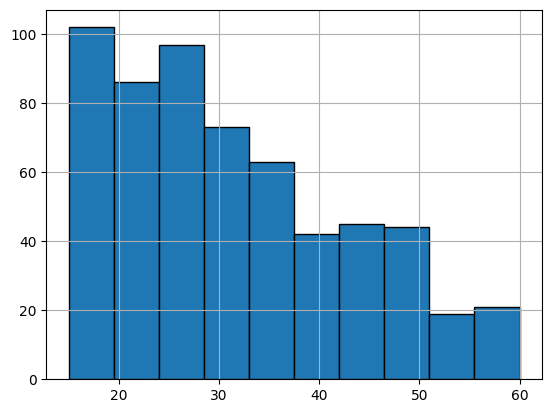

In [60]:
X_train["Age"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

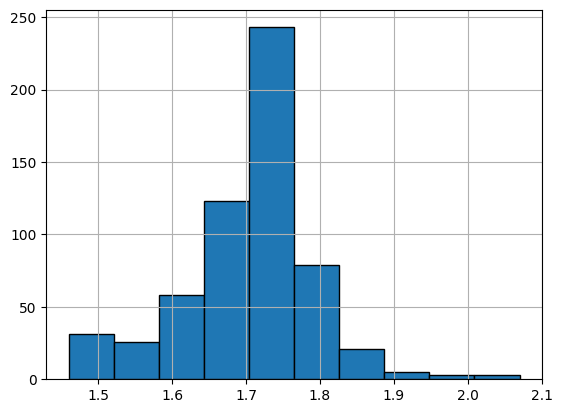

In [61]:
X_train["Height"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

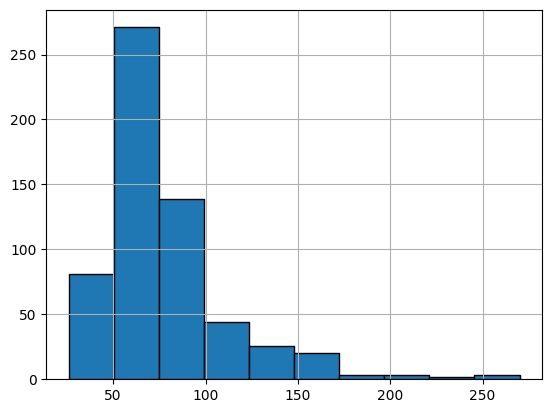

In [62]:
X_train["Weight"].hist(edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

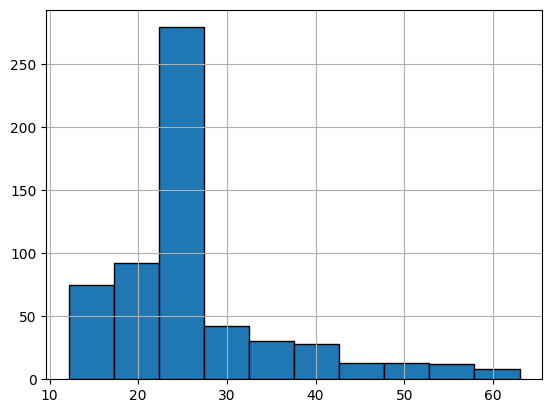

In [63]:
X_train["Bmi"].hist(edgecolor="black")
plt.show

## Modelo predictivo

### 3 Opciones

-Modelo de regresión
-Arbol de decisiones
-Random Forest

## DecisionTreeRegressor

In [64]:
from sklearn.tree import DecisionTreeRegressor

bmidata_model_v2 = DecisionTreeRegressor()

# Entrenamiento del modelo
bmidata_model_v2.fit(X_train, y_train)

# Predicción
y_pred = bmidata_model_v2.predict(X_test)

y_test_list = y_test.tolist()
s=0
print("Prec. real    Prec. estimado   Error absoluto   Porcentaje de error")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r - e)
  e_p = abs(100 - ((r - e) / r) * 100)
  s = s+e_p

  print (f"{r:10.2f}   {e:12.2f}  {e_abs:16.2f}  {e_p:16.2f}")

print("precisión es ", s/20)

Prec. real    Prec. estimado   Error absoluto   Porcentaje de error
      4.00           4.00              0.00            100.00
      1.00           1.00              0.00            100.00
      2.00           2.00              0.00            100.00
      1.00           1.00              0.00            100.00
      2.00           2.00              0.00            100.00
      5.00           5.00              0.00            100.00
      0.00           0.00              0.00               nan
      1.00           1.00              0.00            100.00
      2.00           2.00              0.00            100.00
      3.00           3.00              0.00            100.00
      1.00           1.00              0.00            100.00
      1.00           1.00              0.00            100.00
      4.00           4.00              0.00            100.00
      1.00           1.00              0.00            100.00
      2.00           2.00              0.00            100.00
  

<ipython-input-64-9126b884d6db>:18: RuntimeWarning: invalid value encountered in scalar divide
  e_p = abs(100 - ((r - e) / r) * 100)


In [65]:
from sklearn.metrics import mean_squared_error, r2_score

# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación: 1 es la predicción perfecta.
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  0.0
Coeficiente de determinación:  1.0


## LinearRegression

In [66]:
from sklearn.linear_model import LinearRegression

bmidata_model_v4 = LinearRegression()

# Entrenamiento del modelo
bmidata_model_v4.fit(X_train, y_train)

# Predicción
y_pred = bmidata_model_v4.predict(X_test)

y_test_list = y_test.tolist()

print("Prec. real    Prec. estimado   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r - e)
  print(f"{r:10.2f}   {e:12.2f}  {e_abs:16.2f}")

Prec. real    Prec. estimado   Error absoluto
      4.00           3.23              0.77
      1.00           1.52              0.52
      2.00           1.98              0.02
      1.00           1.28              0.28
      2.00           1.82              0.18
      5.00           4.11              0.89
      0.00           0.03              0.03
      1.00           1.47              0.47
      2.00           1.90              0.10
      3.00           2.70              0.30
      1.00           1.37              0.37
      1.00           1.48              0.48
      4.00           3.34              0.66
      1.00           1.50              0.50
      2.00           1.63              0.37
      1.00           1.17              0.17
      2.00           1.64              0.36
      1.00           1.42              0.42
      2.00           1.80              0.20
      5.00           5.92              0.92


In [67]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación: 1 es la predicción perfecta.
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  0.4560755034220797
Coeficiente de determinación:  0.8700715771789252


## RandomForest

In [68]:
from sklearn.ensemble import RandomForestRegressor

bmidata_model_v3 = RandomForestRegressor()

# Entrenamiento del modelo
bmidata_model_v3.fit(X_train, y_train)

# Predicción
y_pred = bmidata_model_v3.predict(X_test)

y_test_list = y_test.tolist()

print("Prec. real    Prec. estimado   Error absoluto   Porcentaje de error")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r - e)
  e_p = abs(100 - ((r - e) / r) * 100)
  print(f"{r:10.2f}   {e:12.2f}  {e_abs:16.2f}   {e_p:16.2f}")

Prec. real    Prec. estimado   Error absoluto   Porcentaje de error
      4.00           4.00              0.00             100.00
      1.00           1.00              0.00             100.00
      2.00           2.00              0.00             100.00
      1.00           1.00              0.00             100.00
      2.00           2.00              0.00             100.00
      5.00           5.00              0.00             100.00
      0.00           0.00              0.00                nan
      1.00           1.00              0.00             100.00
      2.00           2.00              0.00             100.00
      3.00           3.00              0.00             100.00
      1.00           1.00              0.00             100.00
      1.00           1.00              0.00             100.00
      4.00           4.00              0.00             100.00
      1.00           1.00              0.00             100.00
      2.00           2.00              0.00       

<ipython-input-68-5f752bd505da>:18: RuntimeWarning: invalid value encountered in scalar divide
  e_p = abs(100 - ((r - e) / r) * 100)


In [69]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación: 1 es la predicción perfecta.
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  0.03493041981121782
Coeficiente de determinación:  0.9992378538067638
